In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
x_train[0].shape

(28, 28)

In [5]:
x_train=x_train/255
x_test=x_test/255

In [6]:
x_train_flattened=x_train.reshape(len(x_train),28*28)
x_test_flattened=x_test.reshape(len(x_test),28*28)

In [7]:
x_train_flattened.shape
x_test_flattened.shape

(10000, 784)

In [8]:
model = keras.Sequential([
keras.layers.Dense(10, input_shape=(784,),activation='sigmoid') 
]) 
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy']
)
model.fit(x_train_flattened,y_train,epochs=5)   

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4671 - accuracy: 0.8781
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3036 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 2s 986us/step - loss: 0.2832 - accuracy: 0.9202
Epoch 4/5
1875/1875 [==============================] - 2s 993us/step - loss: 0.2730 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 2s 998us/step - loss: 0.2663 - accuracy: 0.9253


In [9]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 0s 776us/step - loss: 0.2676 - accuracy: 0.9236


[0.2675909101963043, 0.9236000180244446]

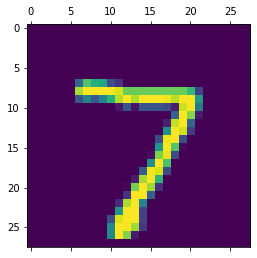

In [10]:
plt.matshow(x_test[0])

In [11]:
y_predicted=model.predict(x_test_flattened)

In [14]:
np.argmax(y_predicted[0])

7

In [15]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [16]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [17]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

In [18]:
cm


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    2,    2,    0,    4,    5,    3,    1,    1],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   6,   11,  925,   15,    9,    5,   12,   10,   35,    4],
       [   4,    1,   19,  920,    0,   28,    2,   12,   16,    8],
       [   2,    2,    5,    1,  914,    0,    9,    4,    9,   36],
       [   9,    3,    4,   33,    9,  785,   14,    7,   22,    6],
       [  13,    3,    6,    1,    7,   14,  911,    2,    1,    0],
       [   1,    6,   23,    7,   10,    1,    0,  946,    1,   33],
       [   7,   13,    7,   28,    9,   39,    9,   12,  836,   14],
       [  11,    7,    1,   11,   26,    9,    0,   22,    3,  919]])>

Text(69.0, 0.5, 'truth')

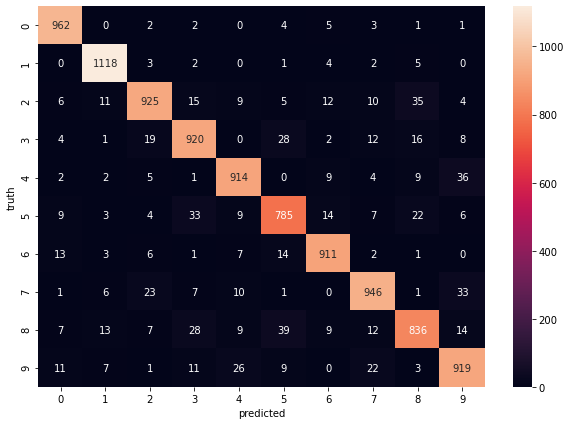

In [19]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')


In [22]:
model = keras.Sequential([
keras.layers.Dense(120, input_shape=(784,),activation='relu'),
keras.layers.Dense(10,activation='sigmoid') 
 
]) 
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy']
)
model.fit(x_train_flattened,y_train,epochs=5)   

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2623 - accuracy: 0.9258
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1159 - accuracy: 0.9652
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0799 - accuracy: 0.9761
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0610 - accuracy: 0.9813
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0474 - accuracy: 0.9858


In [23]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 0s 940us/step - loss: 0.0782 - accuracy: 0.9756


[0.07822015136480331, 0.975600004196167]

In [25]:
y_predicted=model.predict(x_test_flattened)

In [26]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [27]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [28]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(69.0, 0.5, 'truth')

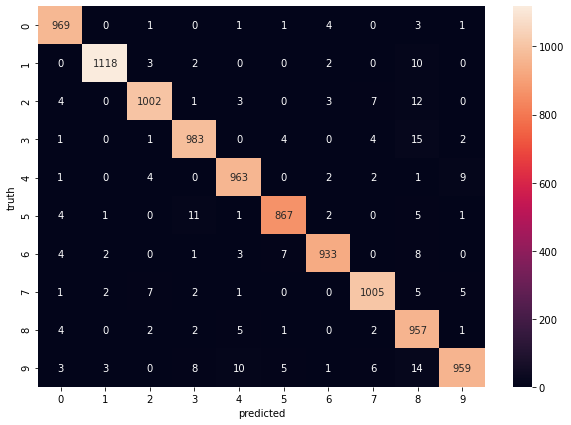

In [31]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')
